#### Université de Bordeaux,  Master Mention Informatique

# Analyse, classification et indexation des données : feuille 2
### Descente de gradient

##### Avant de commencer :
La méthode de la descente de gradient permet de trouver un minimum local d’une fonction de ${\mathbb R}^n$ dans ${\mathbb R}$ . L’objectif de ce TD est de comprendre cette méthode pour pouvoir l’utiliser par la suite dans différentes applications où on cherche à minimiser un critère.


Comme précédemment nous utilisons entre autres <code>numpy</code> pour manipuler vecteurs et matrices.

In [2]:
import numpy as np

### Exercice 1. Polynôme :  calcul et dérivée

1. Ecrivez une fonction python <code>valeurPolynome (coeff, x)</code> qui calcule la valeur du polynôme défini par le vecteur de coefficients <code>coeff</code> pour la valeur <code>x</code>. Les coefficients sont rangés dans l'ordre des puissances croissantes. Par exemple le vecteur $[1, 2, 3]$ définit le polynôme $3x^2+2x+1$. <br>Utilisez pour cela la classe <code>Polynomial</code> du module <code>numpy.polynomial</code>.

In [3]:
from numpy.polynomial import Polynomial
def valeurPolynome (coeff: list, x) :
    P = Polynomial(coeff)
    return P(x)

2. Testez cette fonction pour différentes valeurs de <code>x</code> et pour un polynôme dont vous choisirez les coefficients. Remarquez que le paramètre <code>x</code> peut lui même être un vecteur ou une matrice.

In [4]:
print(valeurPolynome([1, 2, 3], 1))
print(valeurPolynome([1, 2, 3], 2))

6.0
17.0


3. La dérivée d’un polynôme est elle même un polynôme. Toujours en utilisant la classe <code>Polynomial</code>, écrivez une fonction python <code>derivPoly(coeff)</code> qui retourne le tableau de coefficients représentant la dérivée du polynôme défini par <code>coeff</code>. Testez.

In [5]:
def derivPoly(coeff):
    P = Polynomial(coeff)
    return P.deriv()

In [6]:
print(derivPoly([1,1,1,1]))
print(derivPoly([1,2,3,4]))
print(derivPoly([2,4,6,8]))

1.0 + 2.0·x + 3.0·x²
2.0 + 6.0·x + 12.0·x²
4.0 + 12.0·x + 24.0·x²


### Exercice 2. Descente de gradient pour trouver le minimum d’une parabole

1. Exécutez le script python suivant : 

In [7]:
%pip install ipympl

Note: you may need to restart the kernel to use updated packages.


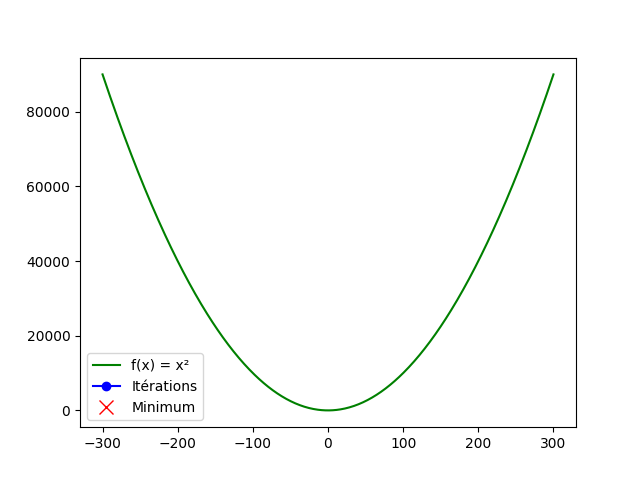

Minimum :  -0.09403699691519997


In [67]:
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Fonction d'update pour l'animation
def update(frame):
    point.set_data(xs[:frame+1], ys[:frame+1])
    if frame == len(xs)-1:
        final.set_data(xs[-1:-2:-1], ys[-1:-2:-1])
    else:
        point.set_data(xs[:frame+1], ys[:frame+1])
    return point, final

def parabole(x):
    return x * x
    
x = np.linspace(-300,300,600)
y = [parabole(i) for i in x]

epsilon = 0.1
nu = 0.2
x0=200
xcurrent = x0 - 2*x0
xprec = x0

# xs et ys servent à stocker, pour l'animation, les valeurs obtenues 
xs = [x0]
ys = [parabole(x0)]
while(abs(xprec - xcurrent) > epsilon):
    xprec  = xcurrent
    xcurrent = xprec - nu*2*xprec
    xs.append(xcurrent)
    ys.append(parabole(xcurrent))
    
# Préparer la figure
fig, ax = plt.subplots()
X = np.linspace(-300,300,600)
ax.plot(X, parabole(X), 'g', label="f(x) = x²")
point, = ax.plot([], [], "ob-", label="Itérations")
final, = ax.plot([], [], "xr", markersize=10, label="Minimum")

ax.legend()

# Animation
ani = FuncAnimation(fig, update, frames=len(xs), interval=600, repeat=False)

# Affichage interactif (avec ipympl)
plt.show()
print('Minimum : ', xcurrent)


2. Retrouvez dans le code les étapes de l’algorithme de descente du gradient en repérant bien l'utilisation de la dérivée.
3. Testez en modifiant l’initialisation de la position du minimum.
4. Comment peut-on obtenir une estimation plus précise de la position du minimum?
5. Testez en modifiant la variable <code>nu</code> par une autre valeur constante inférieure à 1, par exemple <code> nu = 0.6</code>.
Que se passe-t-il si la valeur de nu est fixée à 1 ? Est-ce spécifique à la fonction choisie ?
6. Comparez la version suivante du script avec la précédente

0.9102392266268373
0.7213475204444817
0.6213349345596119
0.5581106265512472
0.5138983423697507
0.48089834696298783


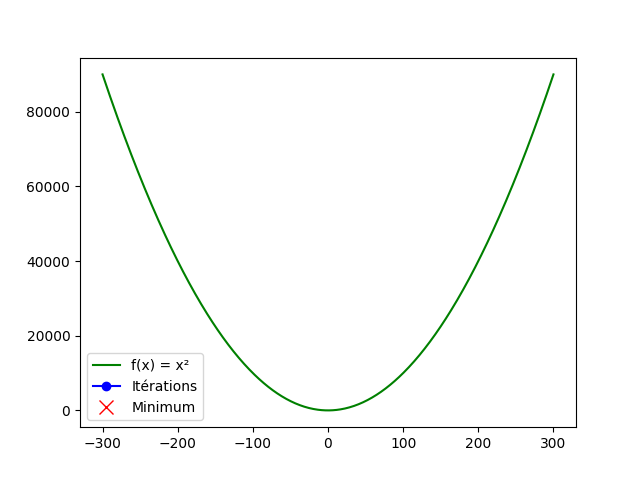

Minimum :  0.0027196136053624087


In [83]:
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Fonction d'update pour l'animation
def update(frame):
    point.set_data(xs[:frame+1], ys[:frame+1])
    if frame == len(xs)-1:
        final.set_data(xs[-1:-2:-1], ys[-1:-2:-1])
    else:
        point.set_data(xs[:frame+1], ys[:frame+1])
    return point, final

def parabole(x):
    return x * x

x = np.linspace(-300,300,600)
y = [parabole(i) for i in x]

epsilon = 0.1
nu = 0.2
attenuation = 3
x0=250
xcurrent = x0 - 2*x0
xprec = x0

# xs et ys servent à stocker, pour l'animation, les valeurs obtenues 
xs = [x0]
ys = [parabole(x0)]
while(abs(xprec - xcurrent) > epsilon):
    xprec  = xcurrent
    nu = 1/np.log(attenuation)
    print(nu)
    attenuation = attenuation+1
    xcurrent = xprec - nu*2*xprec
    xs.append(xcurrent)
    ys.append(parabole(xcurrent))

# Préparer la figure
fig, ax = plt.subplots()
X = np.linspace(-300,300,600)
ax.plot(X, parabole(X), 'g', label="f(x) = x²")
point, = ax.plot([], [], "ob-", label="Itérations")
final, = ax.plot([], [], "xr", markersize=10, label="Minimum")

ax.legend()

# Animation
ani = FuncAnimation(fig, update, frames=len(xs), interval=600, repeat=False)

# Affichage interactif (avec ipympl)
plt.show()
print('Minimum : ', xcurrent)

7. Comment évolue la variable <code>nu</code> au fur et à mesure des itérations ? Quel est l'intérêt de procéder ainsi?


### Exercice 3. Descente de gradient pour trouver le minimum d’un polynôme

1. On choisit comme exemple le polynôme $30 − 61x + 41x^2 − 11x^3 + x^4$ . Ecrivez un script python
qui affiche ce polynôme entre 0 et 6 et qui montre les étapes de la descente de gradient à partir de la valeur initiale 5.

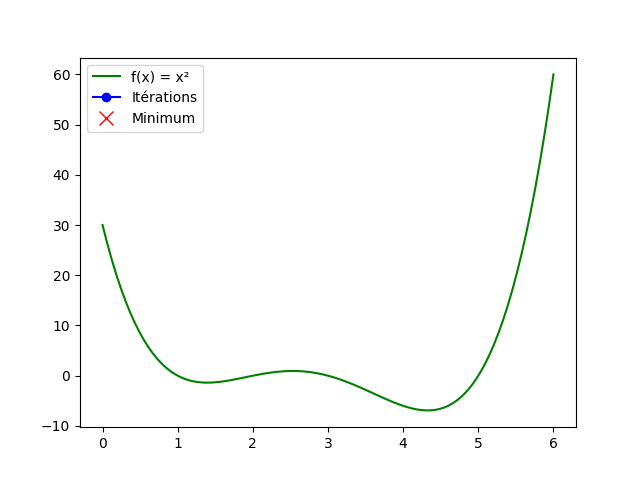

Minimum :  0.0


In [147]:
# Fonction d'update pour l'animation
def update(frame):
    point.set_data(xs[:frame+1], ys[:frame+1])
    if frame == len(xs)-1:
        final.set_data(xs[-1:-2:-1], ys[-1:-2:-1])
    else:
        point.set_data(xs[:frame+1], ys[:frame+1])
    return point, final

coeffs = [30, -61, 41, -11, 1]
epsilon = 0.1
nu = 0.5
attenuation = 10
x0 = 5
xcurrent = x0 - 2*x0
xprec = x0

# xs et ys servent à stocker, pour l'animation, les valeurs obtenues 
xs = [x0]
ys = [valeurPolynome(coeffs, x0)]
while(abs(xprec - xcurrent) > epsilon):
    xprec  = xcurrent
    xcurrent = xprec - nu*2*xprec
    xs.append(xcurrent)
    ys.append(valeurPolynome(coeffs, xcurrent))

# Préparer la figure
fig, ax = plt.subplots()
X = np.linspace(0,6,100)
ax.plot(X, valeurPolynome(coeffs, X), 'g', label="f(x) = x²")
point, = ax.plot([], [], "ob-", label="Itérations")
final, = ax.plot([], [], "xr", markersize=10, label="Minimum")

ax.legend()

# Animation
ani = FuncAnimation(fig, update, frames=len(xs), interval=600, repeat=False)

# Affichage interactif (avec ipympl)
plt.show()
print('Minimum : ', xcurrent)


2. Changez la valeur initiale à 0.
3. Faites varier les paramètres de la descente de gradient (taux d'apprentissage, test d’arrêt) et commentez le
comportement de l’algorithme.

### Exercice 4. Descente de gradient pour trouver le minimum d’une surface

1. On choisit comme exemple la fonction définie par $f(x,y) = (x−1)(x−2)+(y+3)(y+4)$. On visualise une partie de la surface correspondante avec le code ci-dessous. Quels sont les intervalles de variation de $x$ et $y$ dans ce code? Quelles sont les coordonnées du minimum ?

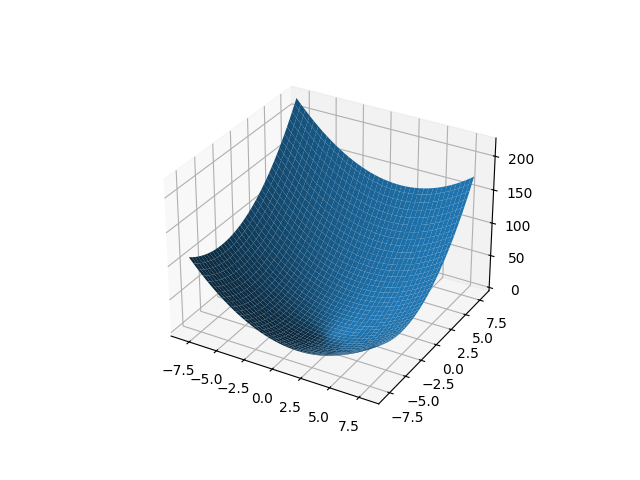

In [148]:
def f(x,y):
    return (x - 1) * (x - 2) + (y + 3) * (y + 4)

x = np.linspace(-8, 8, 160) 
y = np.linspace(-8, 8, 160)
x, y = np.meshgrid(x, y)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(x, y, z) 
plt.show()

2. Ecrivez une fonction python <code>animationDescenteSurface(pdep)</code> qui affiche cette surface et qui montre les étapes de la descente de gradient à partir du point initial <code>pdep</code> donné comme vecteur de deux coordonnées. Pour afficher un point 3D vous utiliserez la fonction <code>scatter</code> de <code>Axes3D</code>.

3. Testez avec comme point initial <code>pdep = (1, -5)</code> puis <code>(-1, -3)</code>, <code>(-1, -5)</code> et <code>(2, -4)</code>.

### Exercice 5. Application : régression linéaire

On veut calculer la droite de régression linéaire correspondant à un nuage de
points 2D $\{(x_1, y_1), \cdots , (x_m, y_m)\}$, c'est-à-dire la droite $y = \theta_1x + \theta_0$ qui minimise le critère suivant : 
$$
\frac 1 m \sum \left( \theta_0 + \theta_1 x_i - y_i\right)^2.
$$

Autrement dit, on cherche à minimiser la moyenne des distances verticales entre chaque point du nuage et la droite. <br>
Utilisez une descente de gradient (en 2D) pour trouver les caractéristiques $\theta_0$ et $\theta_1$ de la droite de régression linéaire correspondant à un nuage de points. Pour générer un nuage de point, vous pouvez utiliser le code suivant :

In [149]:
from random import random
m = 40
sizeNoise = 10
x = [random()*50 + 5 for i in range(m)]
noise = [random() * sizeNoise for i in range(m)] # ou np.rand(m,1) * sizeNoise
pente = 0.8
b =  20
y = [b + pente*x[i] + noise[i] for i in range(m)] 

plt.plot(x,y,'bx')